# 안녕하세요 투빅스 보충 과제입니다 :)

안녕하세요 투빅스 12기 김태한입니다 :)

이번 과제는 코로나 바이러스로 예상치 못한 휴식시간이 생겨 여러분의 딥러닝 감을 유지하고자 드리게 되었습니다.  

투빅이분들이라면 분명 쉽게 해낼거라 믿습니다!!


모르시는 거 있으시면 저 그리고 12기 멘토분들을 많이 많이 괴롭혀주세요!!!

# Assignment 1

여러분들은 저번 과제로 뉴럴넷 구현을 이미 한번 하셨습니다!  

사실 이번 과제의 최종 목적도 뉴럴넷 구현인데요 이미 한번 하셨고 실력들이 워낙 출중하셔서 금방금방 하실수 있으실거에요.  

구현에 바로 들어가기에 앞서 전체 네트워크 구조와 각 구성요소의 행렬 차원 및 오차역전파(back propagation) 복습이 1번 과제입니다.  

**?** 에 들어갈 수식을 채워주시면 됩니다!!  

## Matrix Shape 정리

n : sample_data 수  
d : input_dimension  
h : hidden_layer_dimension  
c : output_dimension  

X : input_data  
W1 : layer1_weight  
b1 : layer1_bias  
H : X*W1+b1
A : activation function 거친 value
W2 : layer2_weight  
b2 : layer2_bias  
S : A*W2+b2  
P : softmax 거친 value  

**X==(n, d)  
W1 ==(d, h) 채워주세요  
b1 ==(h, )  
H  ==(n, h) 채워주세요  
A  ==(n, h)  
W2 ==(h, c)  
b2 ==(c, ) 채워주세요  
S  ==(n, c) 채워주세요  
P  ==(n, c)**

## Matrix 미분 정리
$H = XW+b　　　(n,h) = (n,d)x(d,h)+(h,)$  
$L = f(H)$  
$\frac{\partial L}{\partial W} = \frac{\partial H}{\partial W} \times \frac{\partial L}{\partial H} = X^T\frac{\partial L}{\partial H}$ 　채워주세요  
$\frac{\partial L}{\partial X} = \frac{\partial H}{\partial W} \times \frac{\partial L}{\partial H} = \frac{\partial L}{\partial H}W^T$  채워주세요  
$\frac{\partial L}{\partial b} = 1*\frac{\partial L}{\partial H}$  

## 2Layers Chain Rule 정리
**Forward** 

$H = XW_{1} + b$  
$A = ReLU(H)$  
$S = AW_{2} + b_{2}$  
$P = Softmax(S)$  
$L = -LogLikelihood(P)$


**Backward**

$\frac{\partial L}{\partial S} = P-T$　:　T는 Label  
$\frac{\partial L}{\partial W_{2}} = \frac{\partial S}{\partial W_{2}}\frac{\partial L}{\partial S} = A^T(P-T)$ 　채워주세요  
$\frac{\partial L}{\partial b_{2}} = 1*\frac{\partial L}{\partial S} = P-T$  
$\frac{\partial L}{\partial A} = \frac{\partial L}{\partial S}\frac{\partial S}{\partial A} = (P-T)W_2^T$　채워주세요  
$\frac{\partial L}{\partial H} = \frac{\partial A}{\partial H}\frac{\partial L}{\partial A}$  
$\frac{\partial L}{\partial W_{1}} = \frac{\partial H}{\partial W_{1}}\frac{\partial L}{\partial H} = X^{T}\frac{\partial L}{\partial H}$  
$\frac{\partial L}{\partial b_{1}} = \frac{\partial L}{\partial H}$  

# Assignment 2

같이 드린 파일중 model.py라는 파일이 있을거에요!!!  
그 친구의 빈칸을 채워주시면 되겠습니다~!!  
model.py의 함수는 assignment3의 모델 만들기에서 사용되니 참고하시면서 채워주시면 도움이 될거에요!

# Assignment 3

자 이제 저희가 구현한 모델을 가지고 한번 cifar-10 dataset을 학습해볼게요!!  
근데 시작하기에 앞서 pip install keras 를 해주세요!!  

3번과제의 목적은 하이퍼파라미터를 튜닝하던 다른방법을 사용하던 해서 마지막에 그림그리기에서 높은 validation accuracy가 나오도록 하는 과제입니다!!  

모델을 2층이아니라 본인만의 3층으로 발전시켜도 좋구요 다른 여러가지 방법들이 있겠죠!?!?!?  

가장 높은 validation accuracy를 뽑으신 분께 상품을 드리겠습니다아~!!!

### 데이터 load

keras 프레임워크를 이용하여 데이터를 로드해 옵니다.  
32*32*3차원의 데이터를 3072차원으로 바꾸는 것 까지 해드릴게요.
필요하면 sklearn.preprocessing의 scaler를 사용해보셔도 좋습니다!

In [1]:
#from keras.datasets import cifar10
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train = np.load("./x_train_data.npy")
y_train = np.load("./y_train_data.npy")
x_test = np.load("./x_test_data.npy")
y_test = np.load("./y_test_data.npy")

In [4]:
def preprocessing_data(x_train, x_test, y_train, y_test):
    #change dtype
    x_train = np.array(x_train, dtype=np.float64)
    x_test = np.array(x_test, dtype=np.float64)
    
    #reshaping
    x_train = np.reshape(x_train, (x_train.shape[0], -1))
    x_test = np.reshape(x_test, (x_test.shape[0], -1))
    
    y_train = np.reshape(y_train, (y_train.shape[0],))
    y_test = np.reshape(y_test, (y_test.shape[0],))
        
    #normalizing
    mean_value = np.mean(x_train, axis=0)
    x_train -= mean_value
    x_test -= mean_value
    
    return x_train, x_test, y_train, y_test

In [5]:
x_train, x_test, y_train, y_test = preprocessing_data(x_train, x_test, y_train, y_test)

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 3072)
(1000, 3072)
(5000,)
(1000,)


데이터가 너무 많아서 5000개랑 1000개만 사용해보도록 할게요

In [7]:
x_train = x_train[:5000]
y_train = y_train[:5000]
x_test = x_test[:1000]
y_test = y_test[:1000]

### 데이터 확인

실제 데이터가 어떻게 생겼는지 한번 봅시다

In [8]:
x_train

array([[ -72.4542,  -74.3766,  -69.681 , ...,   -4.4978,  -34.203 ,
         -42.7262],
       [  22.5458,   40.6234,   54.319 , ...,   15.5022,    6.797 ,
          29.2738],
       [ 123.5458,  118.6234,  122.319 , ...,  -47.4978,  -40.203 ,
         -30.7262],
       ...,
       [  35.5458,   26.6234,   12.319 , ...,  -85.4978,  -48.203 ,
         -30.7262],
       [  22.5458,   15.6234,   -7.681 , ...,   66.5022,  120.797 ,
          -0.7262],
       [ -86.4542, -104.3766, -111.681 , ...,   28.5022,   15.797 ,
         -14.7262]])

### 하이퍼파라미터 설정

이제 하이퍼파라미터를 설정해볼게요.  
hidden_size, epoch_size, batch_size, learning_rate등은 전부 하이퍼 파라미터이니 바꾸면서 도전해보세요!!

In [8]:
input_size = 32 * 32 * 3
hidden_size = 230
output_size = 10
epoch_size = 500
batch_size = 100
learning_rate = 0.0001
N = x_train.shape[0]

### 모델 만들기

input_size, hidden_size, output_size는 데이터에 맞게 잘 설정해주세요.

**TWO LAYER**

In [14]:
from Model_Layer import TwoLayerNet, ThreeLayerNet

In [15]:
nn = TwoLayerNet(input_size, hidden_size, output_size)

In [17]:
history = {'val_acc': [],'val_loss': []} #기록해서 그림 그리자!

#코드를 보며 epoch, batch에 대해서 이해해봅시다.
for i in range(epoch_size):
    for j in range(N//batch_size):
        batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
        x_batch = x_train[batch_mask]
        t_batch = y_train[batch_mask]
        
        nn.backward(x_batch, t_batch) # 가중치 갱신
    
    #accuracy와 loss를 기록해둡시다.
    history["val_acc"].append(nn.accuracy(x_test, y_test))
    history["val_loss"].append(nn.forward(x_test, y_test))
    
    if i % 10 == 0:
        print(i, "test accuracy :", nn.accuracy(x_test, y_test))
        print(i, "test loss     :", nn.forward(x_test, y_test))

0 test accuracy : 0.34
0 test loss     : 1.9142349909156746
10 test accuracy : 0.342
10 test loss     : 1.9615663643664734
20 test accuracy : 0.348
20 test loss     : 2.0908296463994556
30 test accuracy : 0.272
30 test loss     : 2.3709970660564177
40 test accuracy : 0.311
40 test loss     : 2.285110121065045
50 test accuracy : 0.29
50 test loss     : 2.357778050840388
60 test accuracy : 0.301
60 test loss     : 2.365481519371042
70 test accuracy : 0.286
70 test loss     : 2.6347749405693848
80 test accuracy : 0.298
80 test loss     : 2.723836430472603
90 test accuracy : 0.287
90 test loss     : 2.670130606478856
100 test accuracy : 0.296
100 test loss     : 2.769930622287048
110 test accuracy : 0.282
110 test loss     : 2.9159151311128397
120 test accuracy : 0.306
120 test loss     : 2.971927331530721
130 test accuracy : 0.275
130 test loss     : 3.0896289560216728
140 test accuracy : 0.29
140 test loss     : 2.9550544485695847
150 test accuracy : 0.285
150 test loss     : 3.109655234

In [42]:
def plot_acc_loss(history):
    fig = plt.figure()
    ax_acc = fig.add_subplot(111)

    ax_acc.plot(range(epoch_size), history['val_acc'], label='정확도(%)', color='darkred')
    #plt.text(3, 14.7, "<----------------정확도(%)", verticalalignment='top', horizontalalignment='right')
    plt.xlabel('epochs')
    plt.ylabel('Validation Accuracy(%)')
    ax_acc.grid(linestyle='--', color='lavender')
    ax_loss = ax_acc.twinx()
    ax_loss.plot(range(epoch_size), history['val_loss'], label='오차', color='darkblue')
    #plt.text(3, 2.2, "<----------------오차", verticalalignment='top', horizontalalignment='left')
    plt.ylabel('Validation Error')
    ax_loss.yaxis.tick_right()
    ax_loss.grid(linestyle='--', color='lavender')

    # 그래프 표시
    plt.show()

    # 나의 최고 validation accuracy는? 두구두구~
    print("나의 최고 validation accuracy : ",max(history['val_acc']))

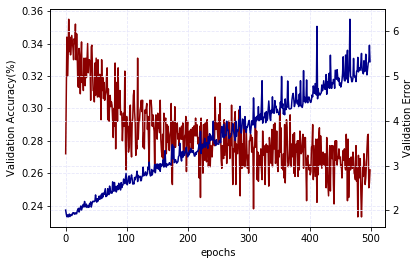

나의 최고 validation accuracy :  0.355


In [27]:
plot_acc_loss(history)

**TWO LAYER에서 hidden size hyperparameter tuning**

In [30]:
hidden_result = {"val_acc":[], "val_loss":[]}
epoch_size = 30
hidden_size = np.arange(10, 500, 20)

for hidden in hidden_size:
    print("hidden:", hidden)
    nn = TwoLayerNet(input_size, hidden, output_size)
    history = {'val_acc': [],'val_loss': []} 
    #코드를 보며 epoch, batch에 대해서 이해해봅시다.
    for i in range(epoch_size+1):
        for j in range(N//batch_size):
            batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
            x_batch = x_train[batch_mask]
            t_batch = y_train[batch_mask]

            nn.backward(x_batch, t_batch) # 가중치 갱신

        #accuracy와 loss를 기록해둡시다.
        history["val_acc"].append(nn.accuracy(x_test, y_test))
        history["val_loss"].append(nn.forward(x_test, y_test))

        if i==30:
            print(i, "test accuracy :", nn.accuracy(x_test, y_test))
            print(i, "test loss     :", nn.forward(x_test, y_test))
    hidden_result["val_acc"].append(max(history["val_acc"]))
    hidden_result["val_loss"].append(min(history["val_loss"]))
    print("="*50)

hidden: 10
30 test accuracy : 0.319
30 test loss     : 2.032114341522019
hidden: 30
30 test accuracy : 0.317
30 test loss     : 2.226776805411433
hidden: 50
30 test accuracy : 0.352
30 test loss     : 2.0439164805932
hidden: 70
30 test accuracy : 0.344
30 test loss     : 2.003342419039822
hidden: 90
30 test accuracy : 0.333
30 test loss     : 2.0269276694629834
hidden: 110
30 test accuracy : 0.314
30 test loss     : 2.179114309272252
hidden: 130
30 test accuracy : 0.316
30 test loss     : 2.153323507525447
hidden: 150
30 test accuracy : 0.302
30 test loss     : 2.248543179352294
hidden: 170
30 test accuracy : 0.322
30 test loss     : 2.1123246652743846
hidden: 190
30 test accuracy : 0.315
30 test loss     : 2.1050102214564377
hidden: 210
30 test accuracy : 0.326
30 test loss     : 2.0212498270087713
hidden: 230
30 test accuracy : 0.32
30 test loss     : 2.072505544618239
hidden: 250
30 test accuracy : 0.324
30 test loss     : 2.0663814071379316
hidden: 270
30 test accuracy : 0.34
30 te

490


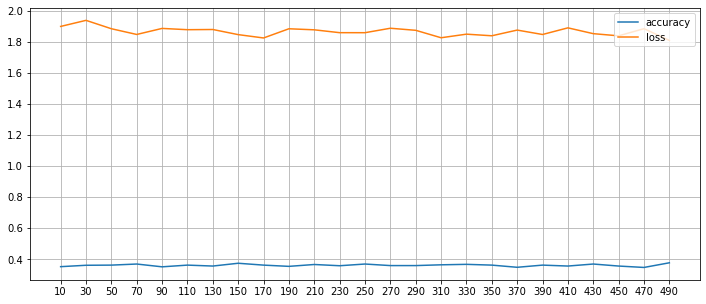

In [39]:
plt.figure(figsize=(12, 5))
plt.plot(np.arange(10, 500, 20), hidden_result["val_acc"], label="accuracy")
plt.plot(np.arange(10, 500, 20), hidden_result["val_loss"], label="loss")
plt.grid(True); plt.legend(["accuracy", "loss"], loc="upper right")
plt.xticks(np.arange(10, 500, 20))
print(np.arange(10, 500, 20)[np.argmax(hidden_result["val_acc"])] )

# hidden node의 수를 조절해보았는 때 크게 차이는 없어보인다.

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


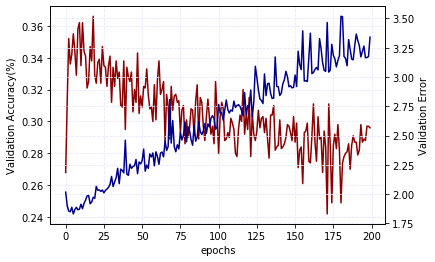

나의 최고 validation accuracy :  0.366


In [46]:
nn = TwoLayerNet(input_size, 490, output_size)
epoch_size = 200
batch_size = 100

history = {'val_acc': [],'val_loss': []} 
for i in range(epoch_size):
    if(i%10==0):print(i)
    for j in range(N//batch_size):
        batch_mask = np.random.choice(N, batch_size) 
        x_batch = x_train[batch_mask]
        t_batch = y_train[batch_mask]
        nn.backward(x_batch, t_batch) 
        
    history["val_acc"].append(nn.accuracy(x_test, y_test))
    history["val_loss"].append(nn.forward(x_test, y_test))
    
plot_acc_loss(history)

---

**THREE LAYER**

In [10]:
input_size = 3072
hidden1_size = 1000
hidden2_size = 500
output_size = 10

epoch_size = 1000
batch_size = 100
learning_rate = 0.00001
N = x_train.shape[0]

In [11]:
from Model_Layer import TwoLayerNet, ThreeLayerNet, FourLayerNet

In [12]:
three_nn = ThreeLayerNet(input_size, hidden1_size, hidden2_size, output_size)

In [13]:
history = {'val_acc': [],'val_loss': []} #기록해서 그림 그리자!

#코드를 보며 epoch, batch에 대해서 이해해봅시다.
for i in range(epoch_size):
    for j in range(N//batch_size):
        batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
        x_batch = x_train[batch_mask]
        t_batch = y_train[batch_mask]
        three_nn.backward(x_batch, t_batch, learning_rate) # 가중치 갱신
    
    #accuracy와 loss를 기록해둡시다.
    history["val_acc"].append(three_nn.accuracy(x_test, y_test))
    history["val_loss"].append(three_nn.forward(x_test, y_test))
    
    if i % 10 == 0:
        print(i, "test accuracy :", three_nn.accuracy(x_test, y_test))
        print(i, "test loss     :", three_nn.forward(x_test, y_test))

0 test accuracy : 0.112
0 test loss     : 2.3313558223454254
10 test accuracy : 0.091
10 test loss     : 2.2779403948820764
20 test accuracy : 0.221
20 test loss     : 2.128547902808091
30 test accuracy : 0.218
30 test loss     : 2.0376092440325366
40 test accuracy : 0.273
40 test loss     : 1.9253585942408258
50 test accuracy : 0.284
50 test loss     : 1.8909917201625894
60 test accuracy : 0.301
60 test loss     : 1.858763050999247
70 test accuracy : 0.329
70 test loss     : 1.8479350648238428
80 test accuracy : 0.337
80 test loss     : 1.8401921239204064
90 test accuracy : 0.341
90 test loss     : 1.8235917434127356
100 test accuracy : 0.353
100 test loss     : 1.860957521023308
110 test accuracy : 0.354
110 test loss     : 1.863074390984477
120 test accuracy : 0.35
120 test loss     : 1.8978807931734774
130 test accuracy : 0.346
130 test loss     : 1.960179925001866
140 test accuracy : 0.352
140 test loss     : 1.9548839937282718
150 test accuracy : 0.363
150 test loss     : 1.98872

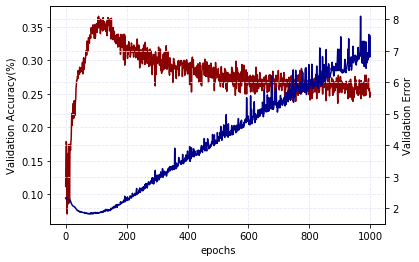

나의 최고 validation accuracy :  0.366


In [14]:
fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(epoch_size), history['val_acc'], label='정확도(%)', color='darkred')
#plt.text(3, 14.7, "<----------------정확도(%)", verticalalignment='top', horizontalalignment='right')
plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epoch_size), history['val_loss'], label='오차', color='darkblue')
#plt.text(3, 2.2, "<----------------오차", verticalalignment='top', horizontalalignment='left')
plt.ylabel('Validation Error')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

# 그래프 표시
plt.show()

# 나의 최고 validation accuracy는? 두구두구~
print("나의 최고 validation accuracy : ",max(history['val_acc']))

# layer를 3개로 쌓아보았는데 크게 차이는 없어보인다 ㅠㅠ

In [47]:
hidden_result = {"val_acc":[], "val_loss":[]}
epoch_size = 100
batch_size = 100
hidden1_size = np.arange(50, 300, 50)
hidden2_size = np.arange(50, 300, 50)

for hidden1 in hidden1_size:
    for hidden2 in hidden2_size:
        print("hidden1:", hidden1, "hidden2:", hidden2)
        nn = ThreeLayerNet(input_size, hidden1, hidden2, output_size)
        history = {'val_acc': [],'val_loss': []} 
        #코드를 보며 epoch, batch에 대해서 이해해봅시다.
        for i in range(epoch_size+1):
            for j in range(N//batch_size):
                batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
                x_batch = x_train[batch_mask]
                t_batch = y_train[batch_mask]

                nn.backward(x_batch, t_batch) # 가중치 갱신

            #accuracy와 loss를 기록해둡시다.
            history["val_acc"].append(nn.accuracy(x_test, y_test))
            history["val_loss"].append(nn.forward(x_test, y_test))

            if i%50==0:
                print(i, "test accuracy :", nn.accuracy(x_test, y_test))
                print(i, "test loss     :", nn.forward(x_test, y_test))
        hidden_result["val_acc"].append(max(history["val_acc"]))
        hidden_result["val_loss"].append(min(history["val_loss"]))
        print("="*50)

hidden1: 50 hidden2: 50
0 test accuracy : 0.102
0 test loss     : 2.5481889295598177
50 test accuracy : 0.23
50 test loss     : 2.0685832218005573
100 test accuracy : 0.306
100 test loss     : 1.9302520131437164
hidden1: 50 hidden2: 100
0 test accuracy : 0.089
0 test loss     : 2.5647967815365926
50 test accuracy : 0.3
50 test loss     : 1.9582314095030613
100 test accuracy : 0.354
100 test loss     : 1.869508206994492
hidden1: 50 hidden2: 150
0 test accuracy : 0.103
0 test loss     : 2.487127340238197
50 test accuracy : 0.291
50 test loss     : 2.001717661491397
100 test accuracy : 0.336
100 test loss     : 1.8928990601842979
hidden1: 50 hidden2: 200
0 test accuracy : 0.089
0 test loss     : 2.4715255816824064
50 test accuracy : 0.26
50 test loss     : 2.051894183141107
100 test accuracy : 0.337
100 test loss     : 1.910410966970996
hidden1: 50 hidden2: 250
0 test accuracy : 0.102
0 test loss     : 2.430501858794385
50 test accuracy : 0.269
50 test loss     : 1.9881449982825186
100 te

In [54]:
# hidden1 100, hidden2 100일 때 acc 높았다
max(hidden_result["val_acc"])

0.37

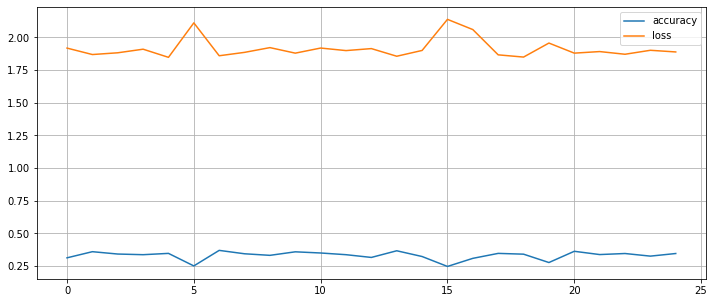

In [53]:
plt.figure(figsize=(12, 5))
plt.plot(hidden_result["val_acc"], label="accuracy")
plt.plot(hidden_result["val_loss"], label="loss")
plt.grid(True); plt.legend(["accuracy", "loss"], loc="upper right")